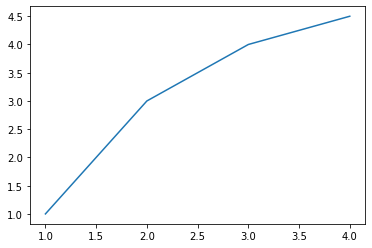

In [1]:
# (https://www.delftstack.com/zh/howto/numpy/curvature-formula-numpy
import numpy as np
import matplotlib.pyplot as plt

# 曲线
coordinates = np.array([[1,1],[1.5,2],[2,3],[2.5,3.5],[3,4],[3.5,4.25],[4,4.5]])

plt.plot(coordinates[:,0], coordinates[:,1])

In [2]:
# 对于与曲线有关的此类问题，我们需要计算给定曲线在每个点的导数。在这种情况下使用 numpy.gradient() 方法，该方法返回 N 维数组的梯度。
#
# 在下面的代码中，我们计算所有点的曲线速度。

x_t = np.gradient(coordinates[:, 0])
y_t = np.gradient(coordinates[:, 1])

vel = np.array([ [x_t[i], y_t[i]] for i in range(x_t.size)])

print(vel)

[[0.5   1.   ]
 [0.5   1.   ]
 [0.5   0.75 ]
 [0.5   0.5  ]
 [0.5   0.375]
 [0.5   0.25 ]
 [0.5   0.25 ]]


In [4]:
# 在计算速度之后，我们继续进行速度。现在，速度就是速度的模数。但是，应该知道，到目前为止，所有事物都是 t 的函数（t 表示时间间隔）。因此，我们将在每一秒的时间间隔内将速度表示为数值的 numpy 数组。
speed = np.sqrt(x_t * x_t + y_t * y_t)

print(speed)

[1.11803399 1.11803399 0.90138782 0.70710678 0.625      0.55901699
 0.55901699]


In [5]:
# 现在，为了计算切线，我们将执行一些变换，以确保速度和速度的大小相同。同样，我们需要能够将矢量值速度函数除以标量速度数组
tangent = np.array([1/speed] * 2).transpose() * vel

print(tangent)


[[0.4472136  0.89442719]
 [0.4472136  0.89442719]
 [0.5547002  0.83205029]
 [0.70710678 0.70710678]
 [0.8        0.6       ]
 [0.89442719 0.4472136 ]
 [0.89442719 0.4472136 ]]


In [6]:
# 同样，我们现在可以隔离切线的分量并计算其梯度以找到法线向量。
# 现在，我们将在下面的代码中实现提供的曲率公式。
ss_t = np.gradient(speed)
xx_t = np.gradient(x_t)
yy_t = np.gradient(y_t)

curvature_val = np.abs(xx_t * y_t - x_t * yy_t) / (x_t * x_t + y_t * y_t)**1.5

print(curvature_val)


[0.         0.04472136 0.17067698 0.26516504 0.256      0.17888544
 0.        ]


In [12]:
# https://www.zhihu.com/question/55058172
from scipy.spatial.distance import pdist
x2=np.array([-856.622,	-846.59,	-836.505,	-826.398,	-816.279,	-806.156,	-796.024,	-785.891,	-775.748,	-765.604,	-755.451,	-745.297,	-735.135,	-724.973,	-714.802])
y2=np.array([1519.23,	1501.71,	1484.29,	1466.81,	1449.36,	1431.89,	1414.44,	1396.98,	1379.54,	1362.08,	1344.64,	1327.2,	1309.76,	1292.32,	1274.88])
def Curvature(x,y):
    k=0
    for i in range(len(x)-2):
        tX =(x[i]-x[1-1],y[i]-y[i-1])
        ty =(x[i+1]-x[i],y[i+1]-y[i])
        d  = 1 - pdist([tX, ty], 'cosine')
        sin = np.sqrt(1-d**2)
        dis=np.sqrt((x[i-1]-x[i+1])**2+(y[i-1]-y[i+1])**2)
        k =2*sin/dis
    return k

In [13]:
k = Curvature(x2,y2)
k

array([0.03882735])